In [377]:
import pandas as pd
import numpy as np

In [378]:
df = pd.read_csv("C:/yogesh/data_sets/challenge_data_20.csv")

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 4 columns):
time                       2003 non-null object
operating_hours            2003 non-null int64
fuel_consumption(liter)    2003 non-null float64
engine_id                  2003 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 62.7+ KB


In [380]:
df.isnull().sum()

time                       0
operating_hours            0
fuel_consumption(liter)    0
engine_id                  0
dtype: int64

In [381]:
df['time'] = pd.to_datetime(df['time'])
df = df.groupby('time')['fuel_consumption(liter)'].sum().reset_index()
df = df.set_index('time')

In [382]:
df.index

DatetimeIndex(['2017-12-19', '2017-12-20', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28',
               ...
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-24', '2018-03-25', '2018-03-26', '2018-03-27',
               '2018-03-28', '2018-03-29'],
              dtype='datetime64[ns]', name='time', length=101, freq=None)

In [383]:
main_ts = df['fuel_consumption(liter)'].resample('d').mean()
ts = main_ts[:86]
tets_ts = main_ts[86:]

In [384]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 12

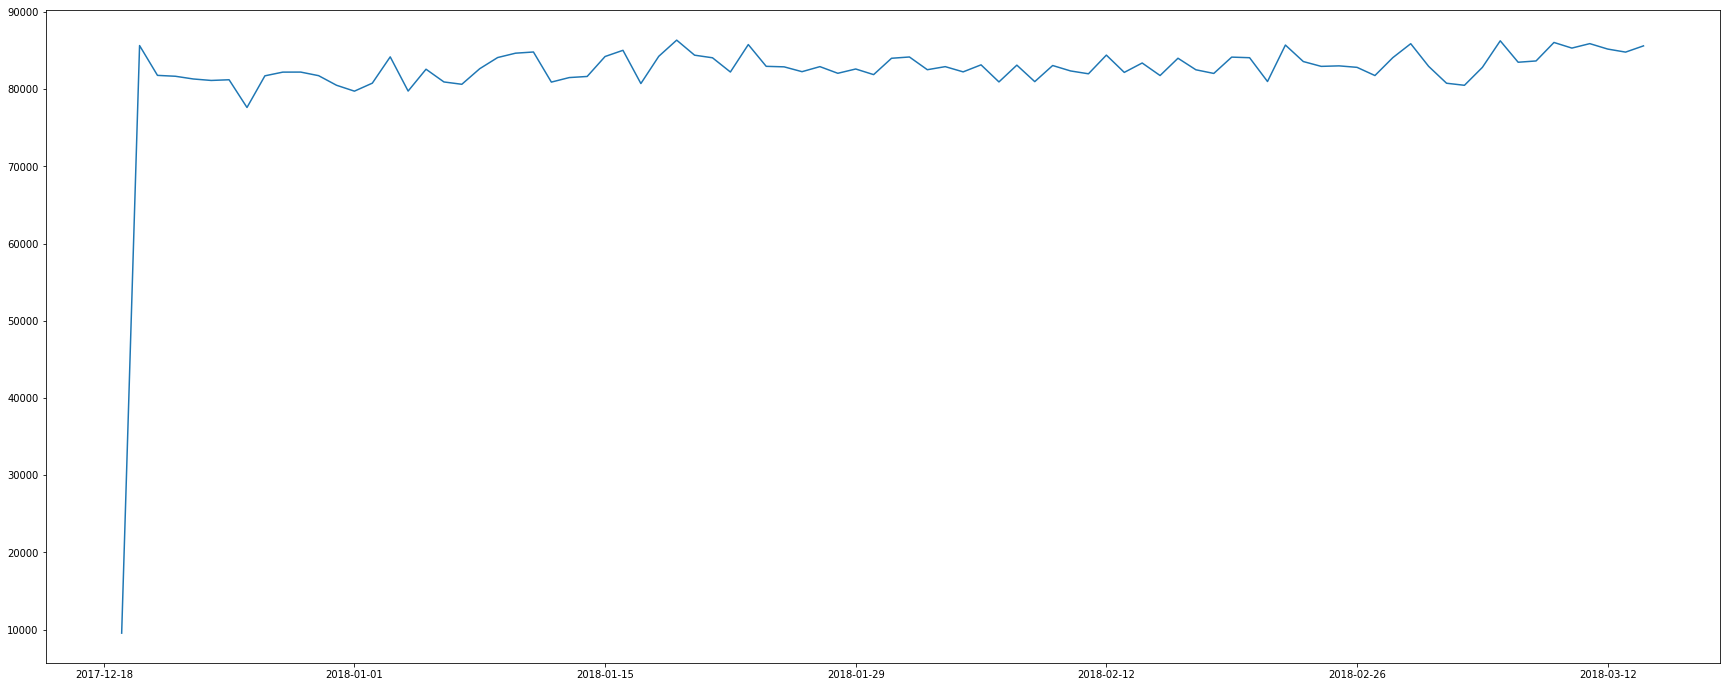

In [385]:
plt.plot(ts)

results of dickey fuller test
Test Statistic                -43.699880
p-value                         0.000000
#Lags Used                      0.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


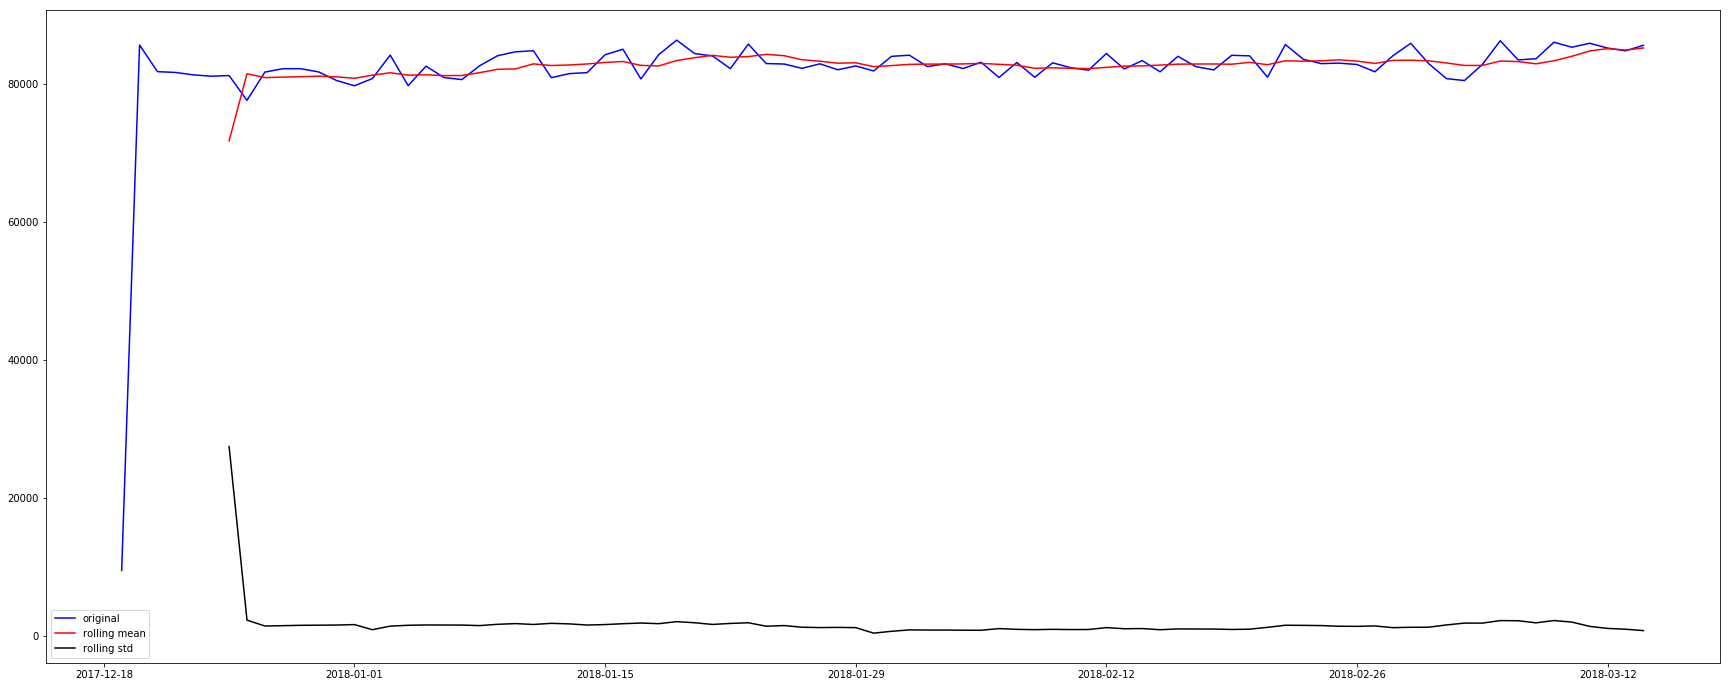

In [386]:
#normal time series 
from statsmodels.tsa.stattools import adfuller
rolmean = ts.rolling(7).mean()
rolstd = ts.rolling(7).std()

orig = plt.plot(ts,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')

#dickey-fuller-test
#null hypothesis - ts is non stationary
#if Test Statistic > Critical Values then accept the null hypo
#if Test Statistic < Critical Values then reject the null hypo

print('results of dickey fuller test')
dftest = adfuller(ts,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [387]:
ts_log = np.log(ts)

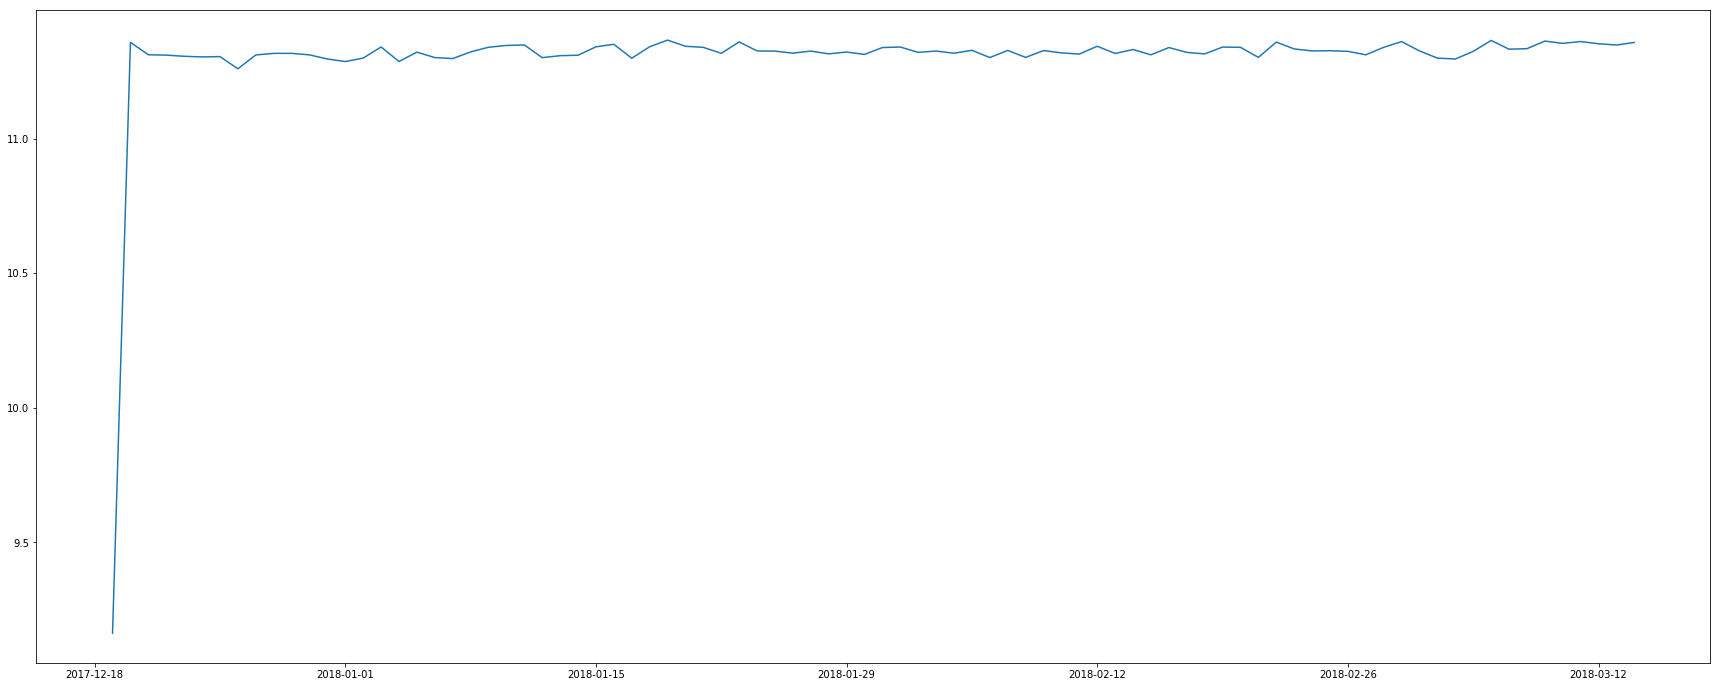

In [388]:
plt.plot(ts_log)

In [389]:
log_rolling = ts_log.rolling(7).mean()

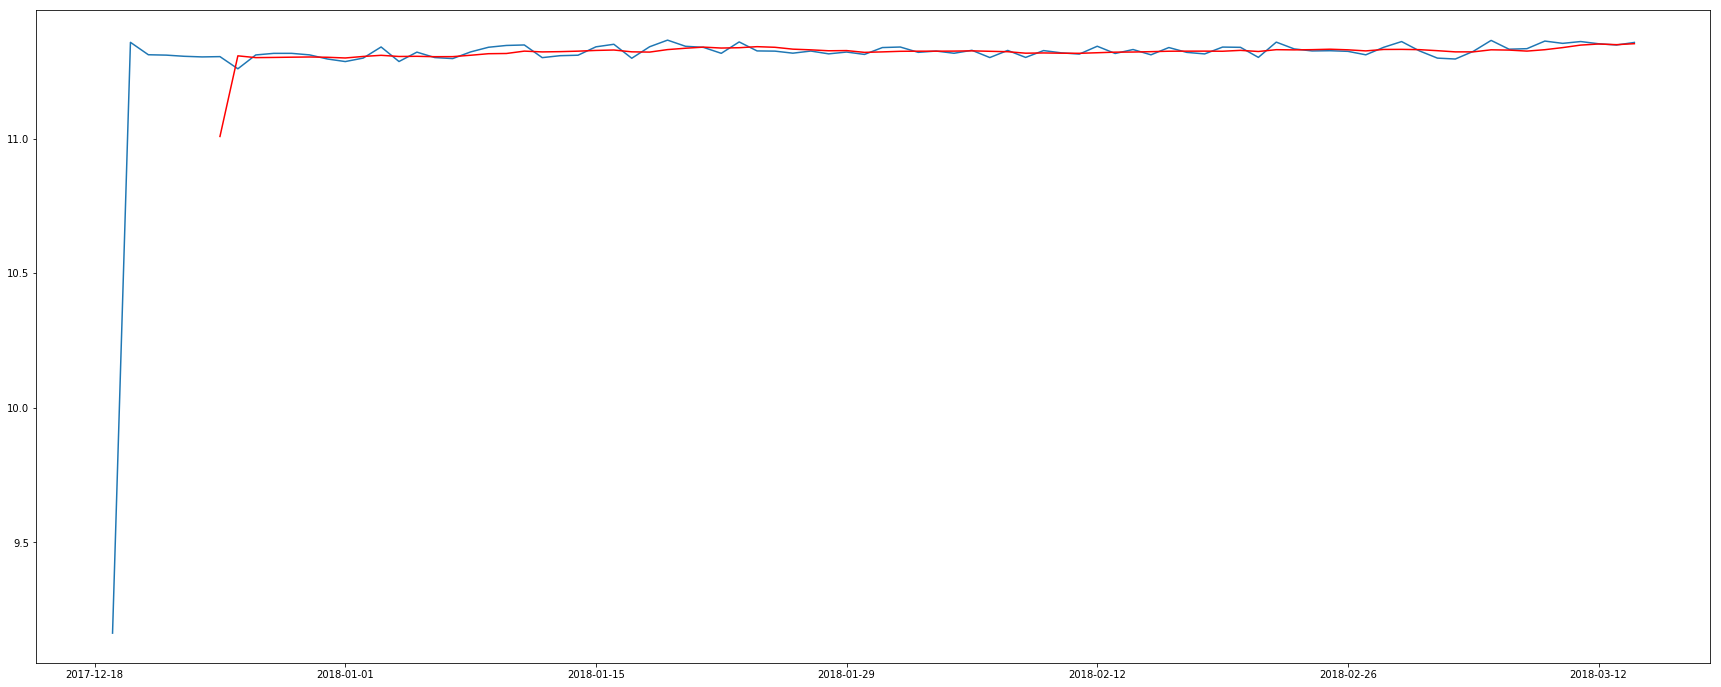

In [390]:
plt.plot(ts_log)
plt.plot(log_rolling , color = 'red')

results of dickey fuller test
Test Statistic                -22.860279
p-value                         0.000000
#Lags Used                      0.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


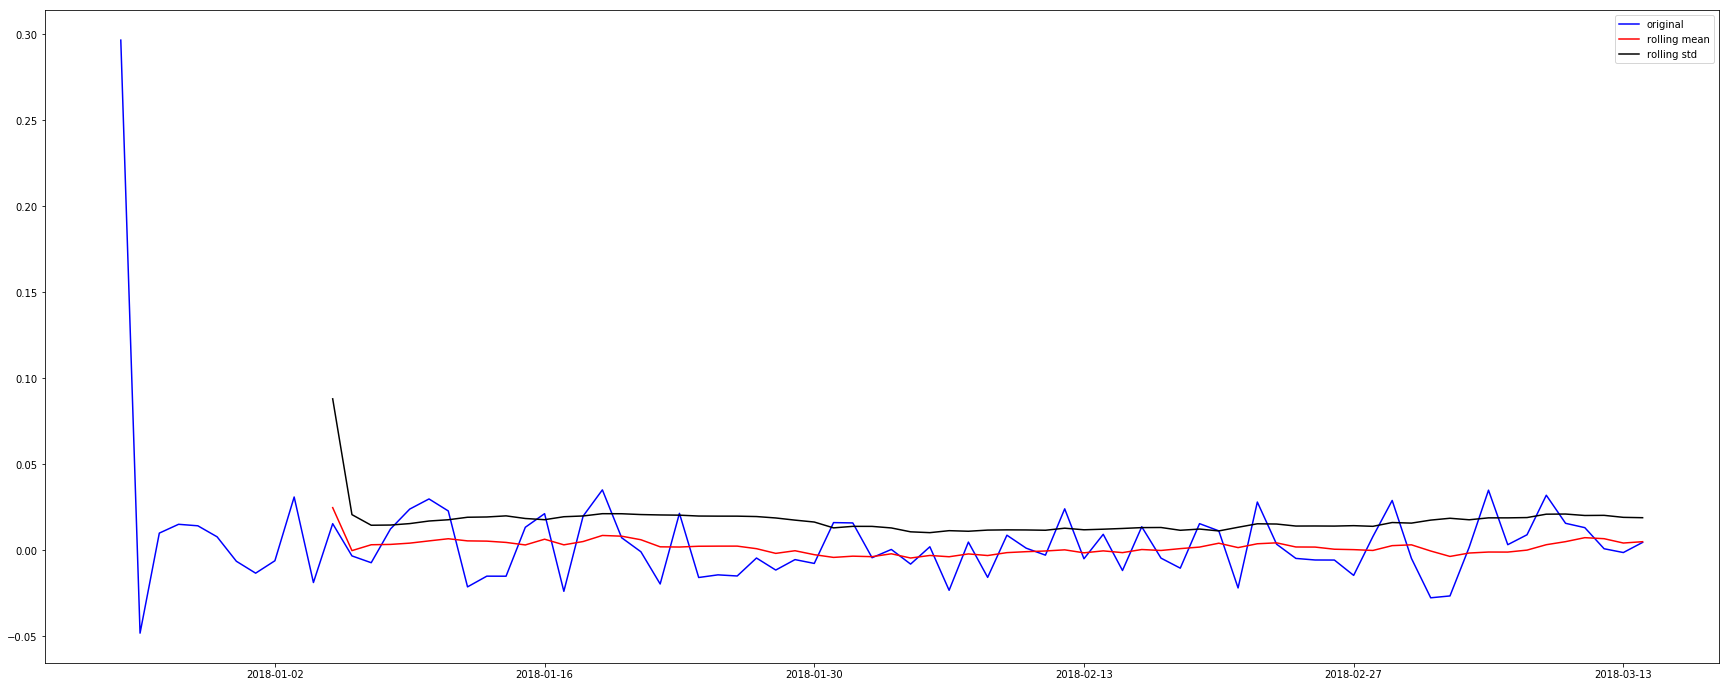

In [391]:
ts_log_diff = ts_log - log_rolling
ts_log_diff.dropna(inplace=True)

rolmean = ts_log_diff.rolling(12).mean()
rolstd = ts_log_diff.rolling(12).std()

orig = plt.plot(ts_log_diff,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')

#dickey-fuller-test
#null hypothesis - ts is non stationary
#if Test Statistic > Critical Values then accept the null hypo
#if Test Statistic < Critical Values then reject the null hypo

print('results of dickey fuller test')
dftest = adfuller(ts_log_diff,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

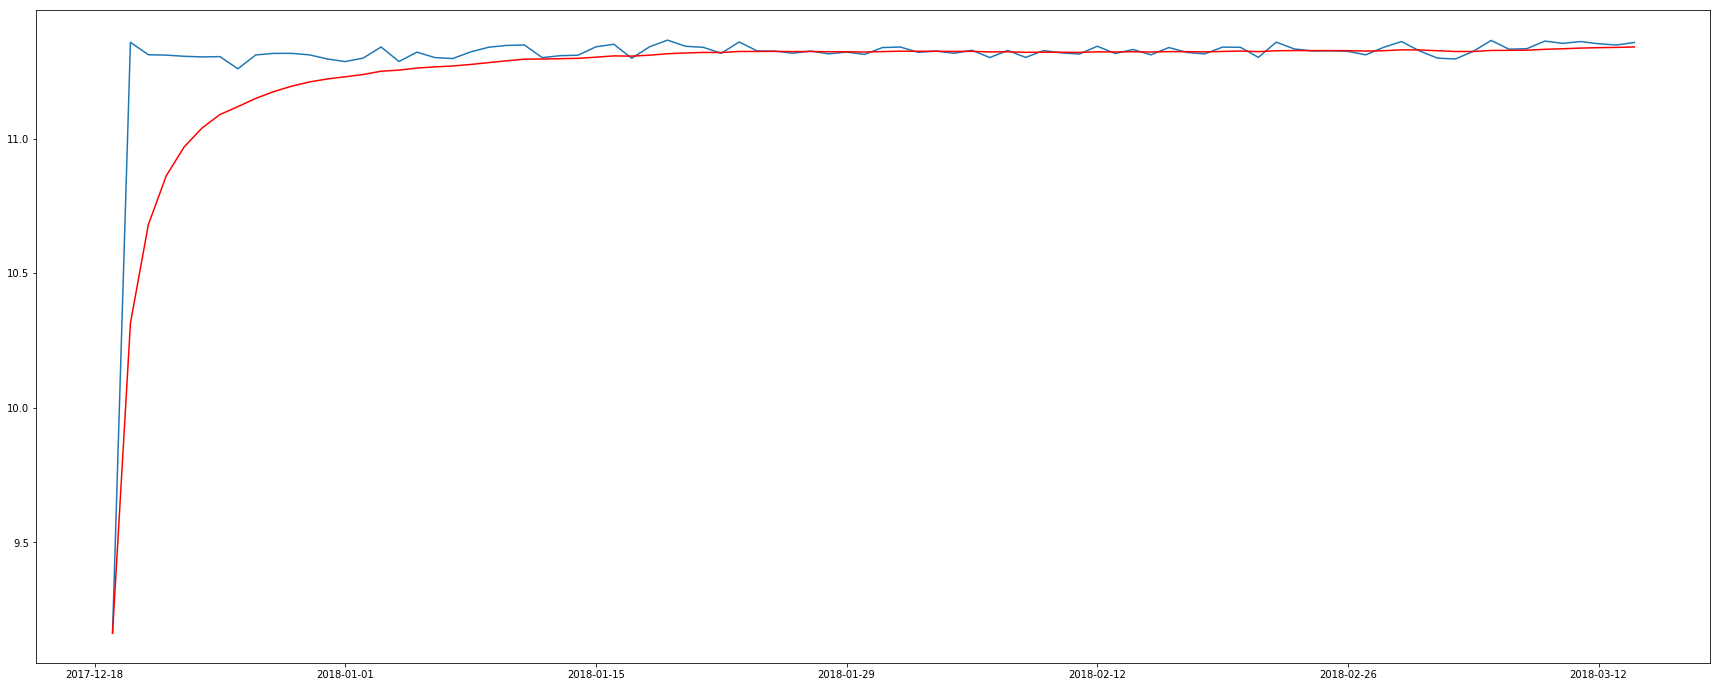

In [392]:
exweighted_avg = ts_log.ewm(halflife=7).mean()
plt.plot(ts_log)
plt.plot(exweighted_avg,color = 'red')

In [393]:
exweighted_avg_diff = ts_log - exweighted_avg

results of dickey fuller test
Test Statistic                -5.975947e+00
p-value                        1.887425e-07
#Lags Used                     4.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
Critical Value (10%)          -2.586191e+00
dtype: float64


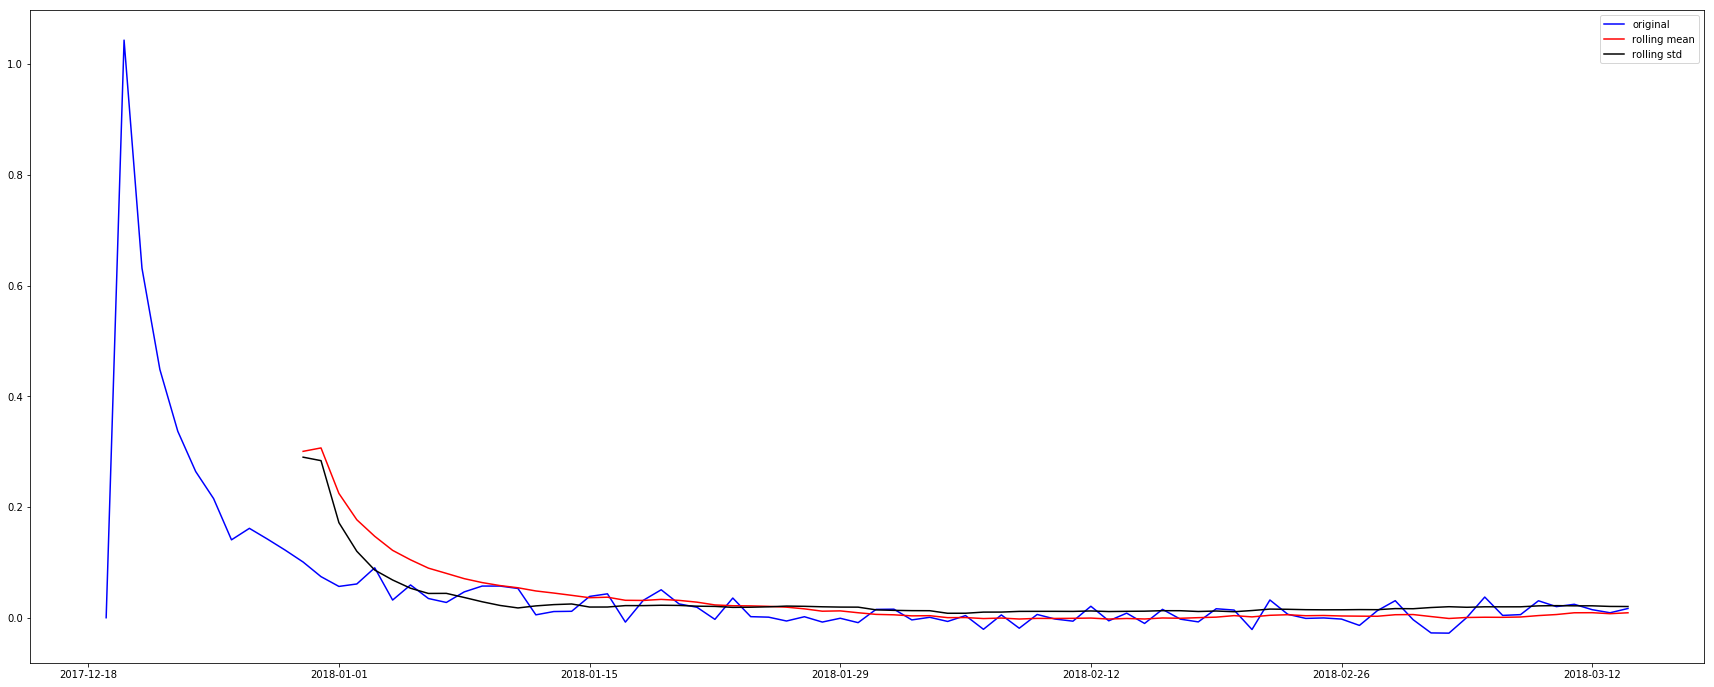

In [394]:
rolmean = exweighted_avg_diff.rolling(12).mean()
rolstd = exweighted_avg_diff.rolling(12).std()

orig = plt.plot(exweighted_avg_diff,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')

#dickey-fuller-test
#null hypothesis - ts is non stationary
#if Test Statistic > Critical Values then accept the null hypo
#if Test Statistic < Critical Values then reject the null hypo

print('results of dickey fuller test')
dftest = adfuller(exweighted_avg_diff,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

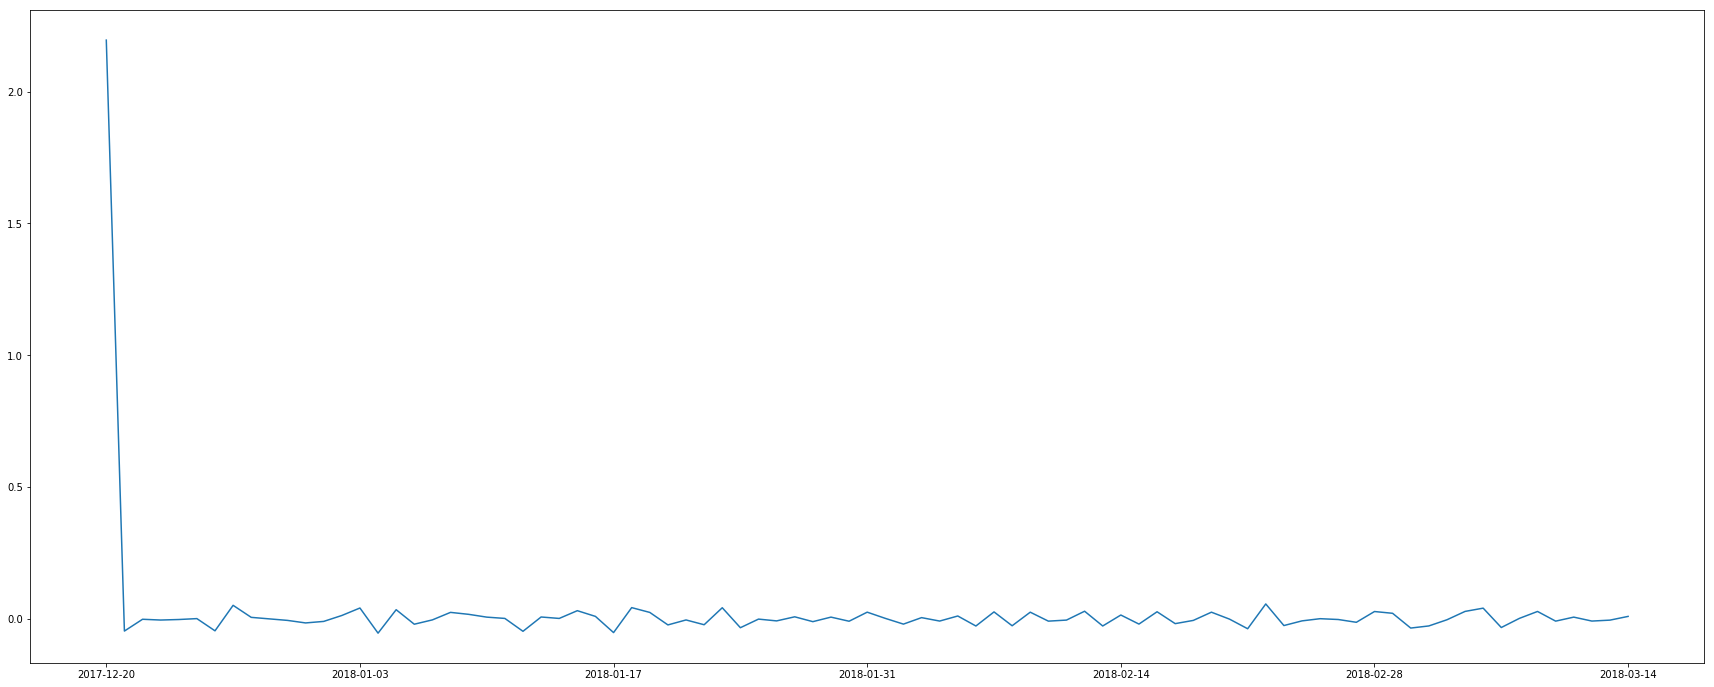

In [395]:
#differencing 1st order
ts_log_difference = ts_log - ts_log.shift()
plt.plot(ts_log_difference)

results of dickey fuller test
Test Statistic                -22.860279
p-value                         0.000000
#Lags Used                      0.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


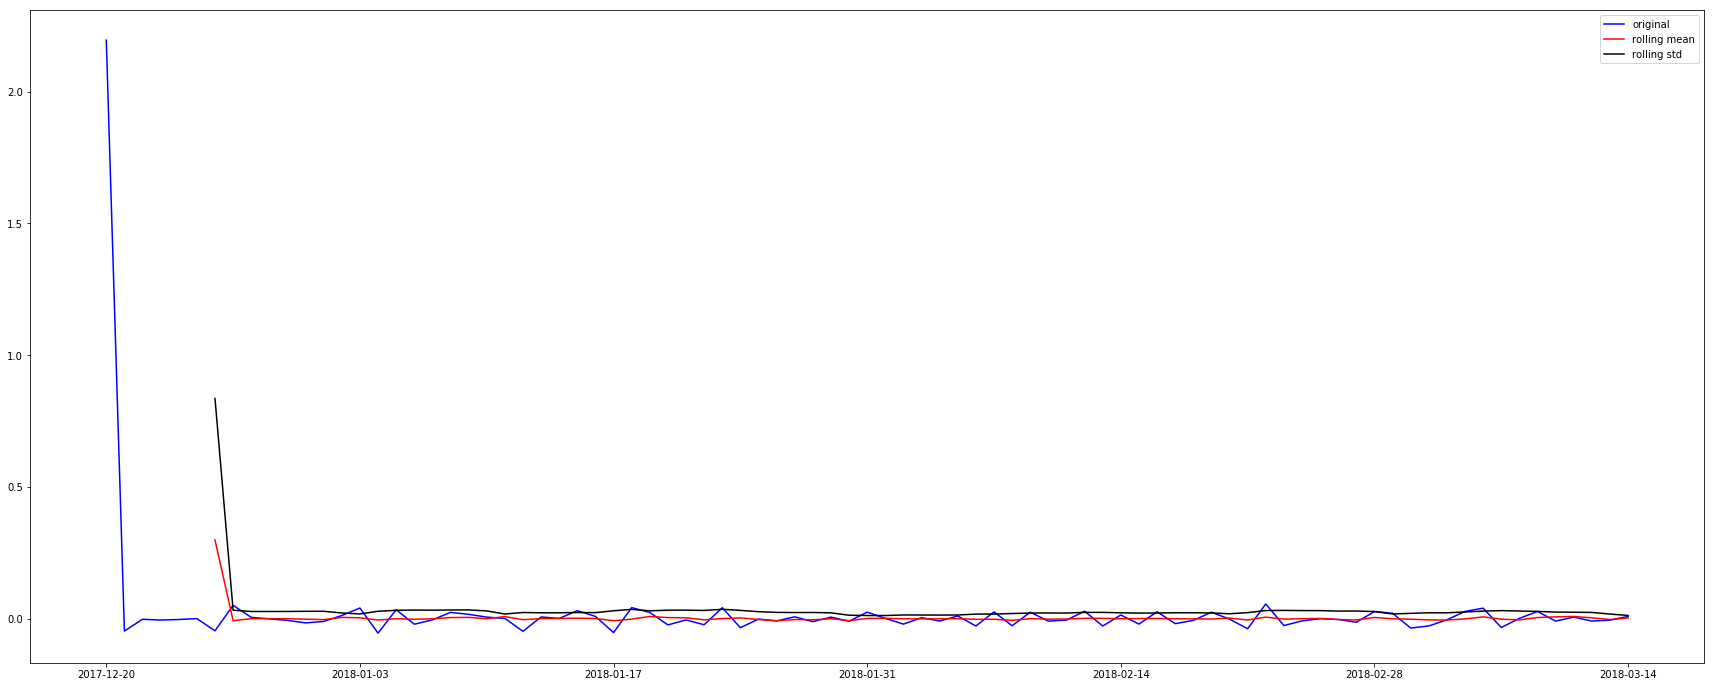

In [396]:
ts_log_difference.dropna(inplace=True)
rolmean = ts_log_difference.rolling(7).mean()
rolstd = ts_log_difference.rolling(7).std()

orig = plt.plot(ts_log_difference,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')

#dickey-fuller-test
#null hypothesis - ts is non stationary
#if Test Statistic > Critical Values then accept the null hypo
#if Test Statistic < Critical Values then reject the null hypo

print('results of dickey fuller test')
dftest = adfuller(ts_log_diff,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [397]:
#2 decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decomp = seasonal_decompose(ts_log)

In [398]:
trend = seasonal_decomp.trend
seasonal = seasonal_decomp.seasonal
residual = seasonal_decomp.resid

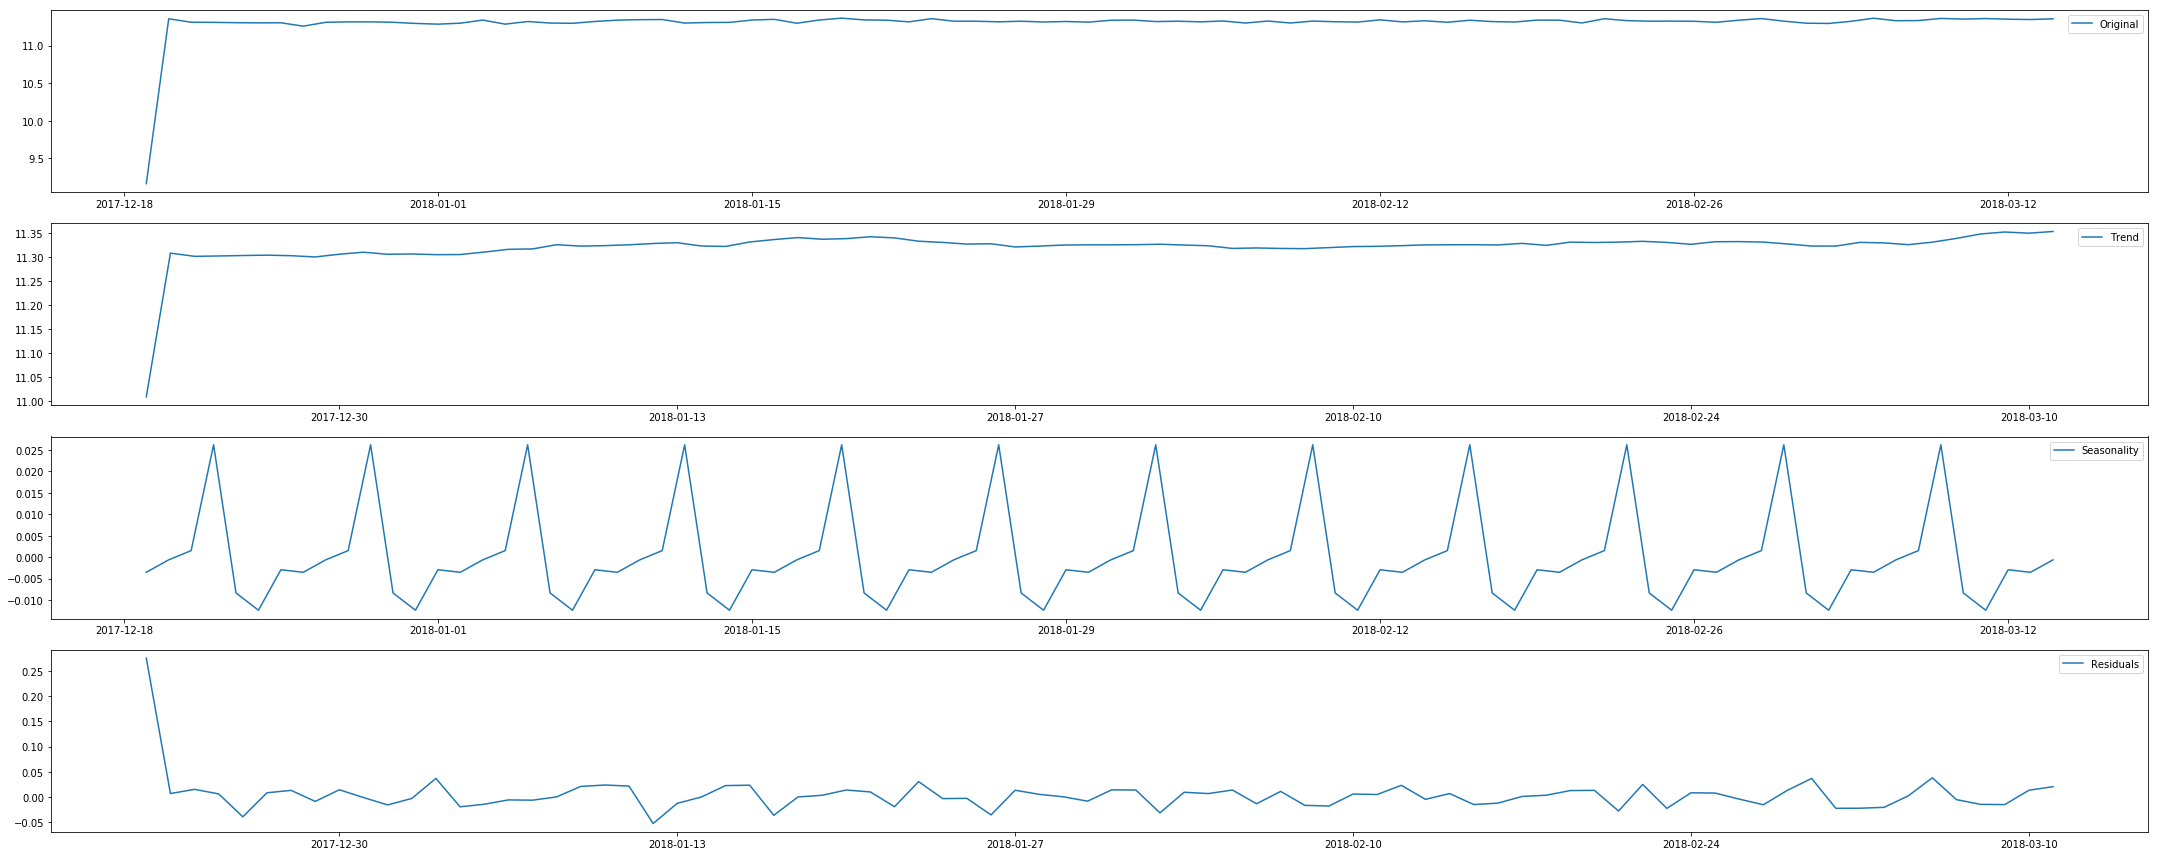

In [399]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

results of dickey fuller test
Test Statistic                -6.763507e+00
p-value                        2.753985e-09
#Lags Used                     5.000000e+00
Number of Observations Used    7.400000e+01
Critical Value (1%)           -3.521980e+00
Critical Value (5%)           -2.901470e+00
Critical Value (10%)          -2.588072e+00
dtype: float64


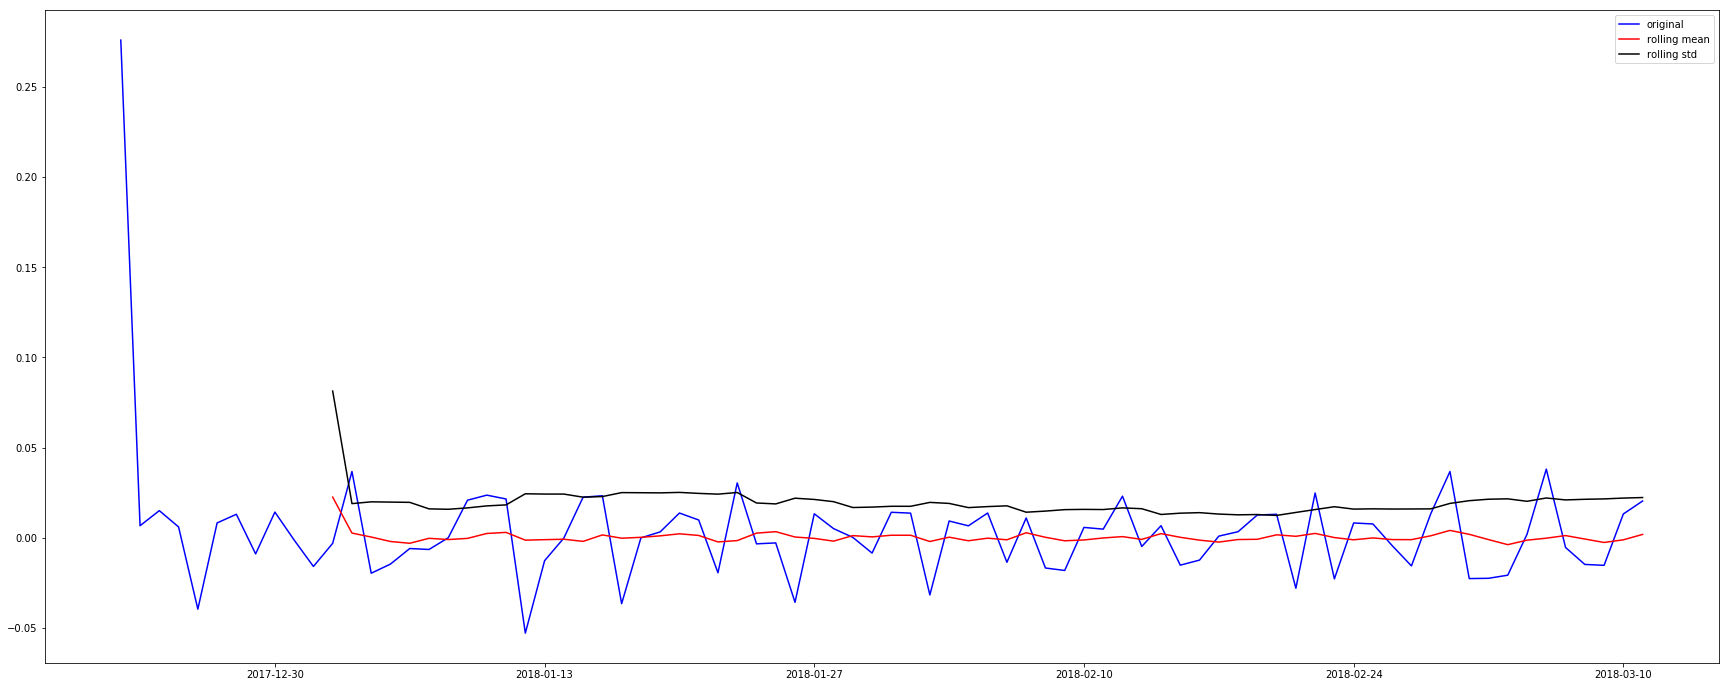

In [400]:
log_resedual = seasonal_decomp.resid
log_resedual.dropna(inplace=True)

rolmean = log_resedual.rolling(12).mean()
rolstd = log_resedual.rolling(12).std()

orig = plt.plot(log_resedual,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')

#dickey-fuller-test
#null hypothesis - ts is non stationary
#if Test Statistic > Critical Values then accept the null hypo
#if Test Statistic < Critical Values then reject the null hypo

print('results of dickey fuller test')
dftest = adfuller(log_resedual,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [401]:
#we can see there no significant trend or seasnality associated with ts

In [402]:
#applying ARIMA model
# visualizing acf and pacf

In [403]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

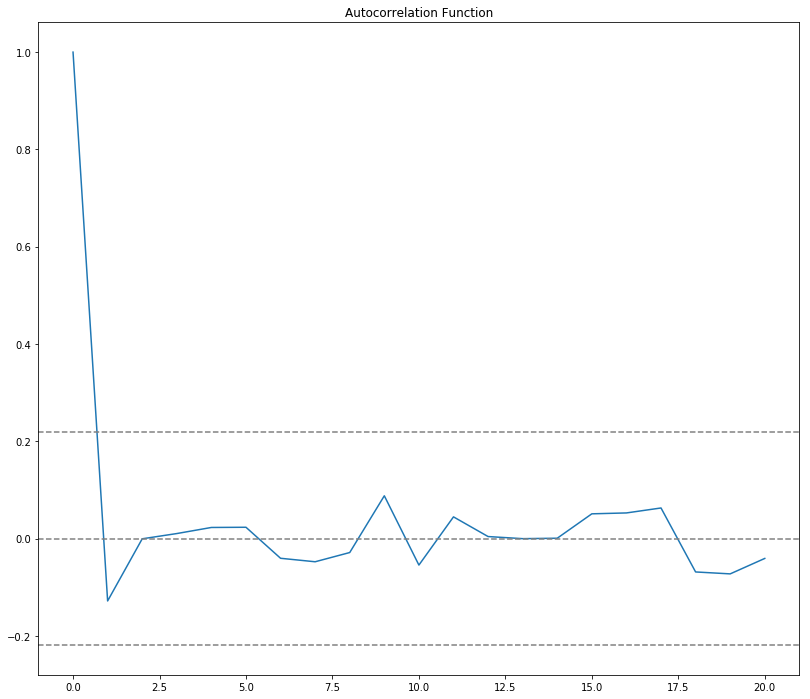

In [404]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [405]:
# q = 1

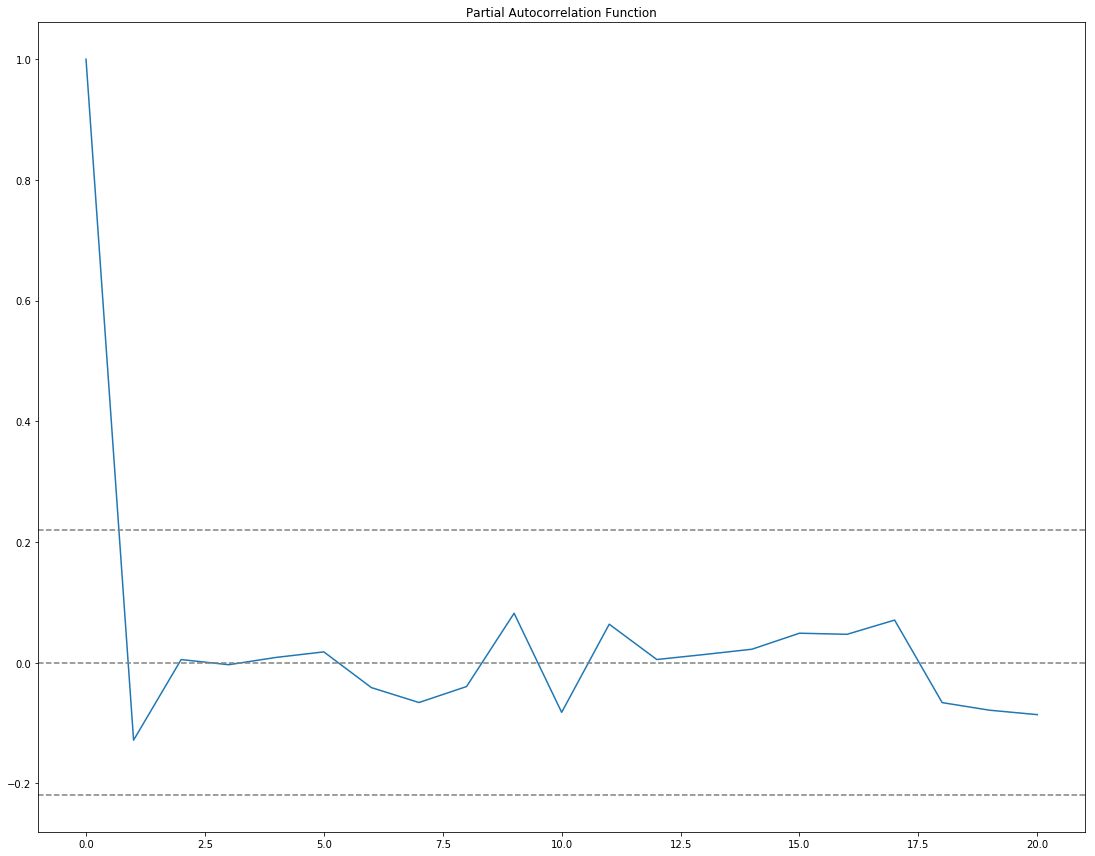

In [406]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [407]:
#p = 1

In [423]:
from statsmodels.tsa.arima_model import ARIMA

In [424]:
model = ARIMA(ts_log_diff, order=(1, 0, 1))

In [425]:
# passing already 1 ordered differenced data so keeping d value = 0

Text(0.5,1,'RSS: 0.1277')

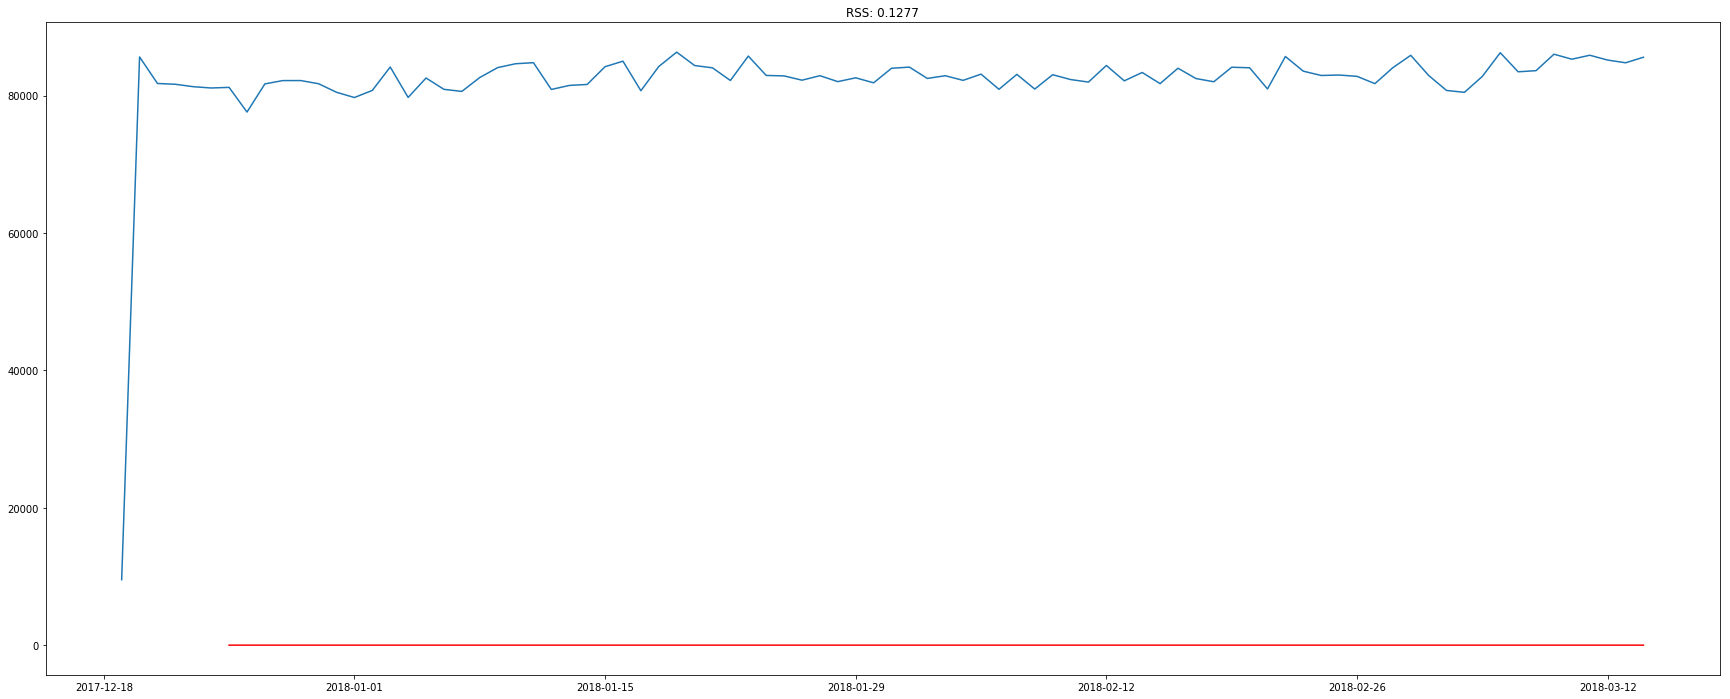

In [426]:
results_AR = model.fit()  
plt.plot(ts)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [428]:
#for 15 days prediction 
test_log = np.log(tets_ts)
test_log_rolling = test_log.rolling(7).mean()
test_log_diff = test_log - test_log_rolling
test_log_diff.dropna(inplace=True)
data = model.predict(test_log_diff)

In [435]:
data = np.exp(data)

In [439]:
df_test = pd.DataFrame(data,columns=['antilog_test_valules'])

In [441]:
df_test.to_csv("C:/yogesh/output.csv")

In [ ]:
#because if time constraints adding only antilog values